# Logisitic Map Equation and Chaos Theory
###### Created by Kai Weterings, xx/xx/2023
Welcome to a short overview of a part of chaos theory which displays the sensitivity of certain dynamic systems to initial conditions.   
Chaos theory is an area of mathematics and the physical sciences which describes determinisic systems which show random and chaotic behaviour in certain circumstances (due to given parametres of the system). This field has found great importance due to the fact that many systems in the world (nature, stock markets, etc...) behave randomly, however some signs of constant results can be found every now and then.  
The following notebook will explore the logistic map equation, often used to model population sizes and growths, and the presence of unpredictable outcomes given certain constraints.

The cell bellow is to import the necessary libraries and initialise certain settings for the code to work.

In [8]:
import sympy as sym
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib widget

In [2]:
x_n, x_n1, r = sym.symbols('x_n x_n+1 r')
log_map = sym.Eq(x_n1, r*x_n*(1 - x_n))     # Logistic map equation

Below you will find the logistic map equation mentioned previously;

In [3]:
log_map

Eq(x_n+1, r*x_n*(1 - x_n))

In [11]:
#Defining a function to call for the logistic map equation
def f(x_n, r):
    return r*x_n*(1 - x_n)

The following couple of cells will be plotting the logistic map equation for various iterated versions of the function to compare the populations changes after iterating the equation however many times using initial population $x_0$. This will allow us to see whether the population manages to stabalise at a value or if the population will take random/unpredictable values after various interations.  
We will be examining the effect of differing growth rate $r$ on the behaviour of the iterated instances of the logistic map equation (plotting $x_{n+1}$ against $x_n$).

In [5]:
def x_n_vs_x_n1(r, iterable, ax0, ax1):
    x0 = np.arange(0,1.01,0.01)
    x = np.arange(0,1.01,0.01)
    for _ in range(iterable):          # Creating various plots for each iterated instance of the logistic map equation
        ax[ax0,ax1].plot(x0, f(x, r))
        x = f(x, r)
    ax[ax0,ax1].set_title(f"r = {r}")  # Preparing for a (2,2) subplot figure for all r used

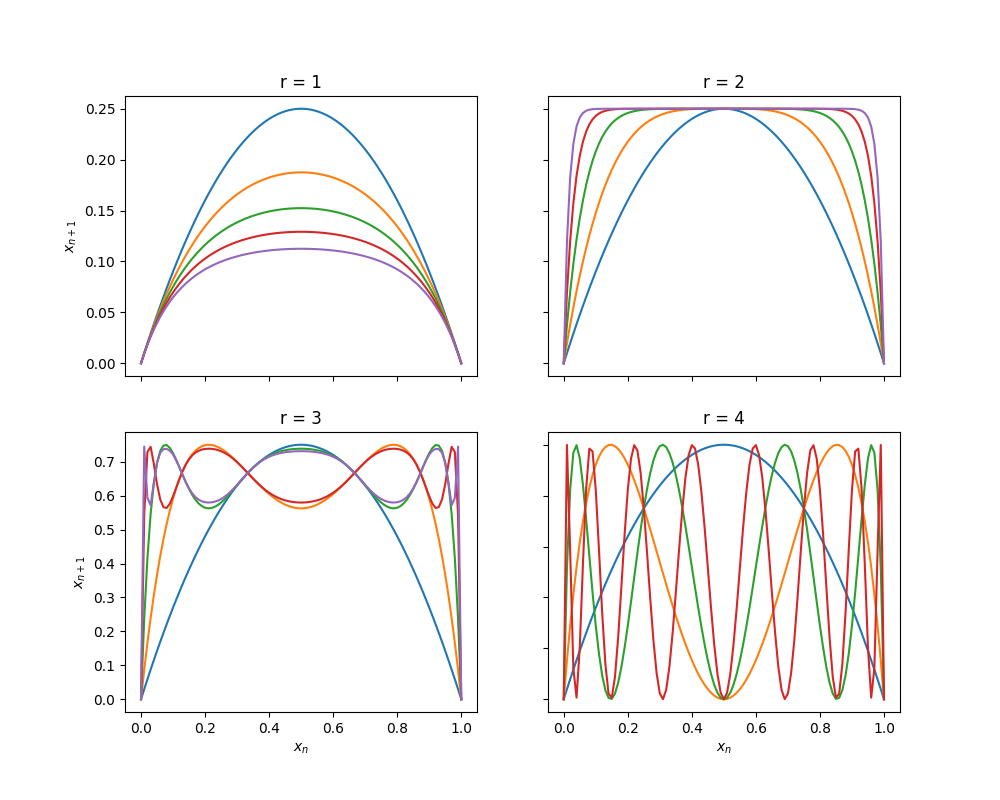

In [21]:
fig, ax = plt.subplots(2,2, figsize=(10,8), sharex=True)
x_n_vs_x_n1(1, 5, 0, 0)        # Plotting iterated versions for growths rates 1,2,3,4
x_n_vs_x_n1(2, 5, 0, 1)
x_n_vs_x_n1(3, 5, 1, 0)
x_n_vs_x_n1(4, 4, 1, 1)

for ax in ax.flat:             # Adding labels
    ax.set(xlabel='$x_n$', ylabel='$x_{n+1}$')
    ax.label_outer()

plt.savefig('x_n_vs_x_n1.png') # Saving the below plot as .png in the same project folder 
plt.show()

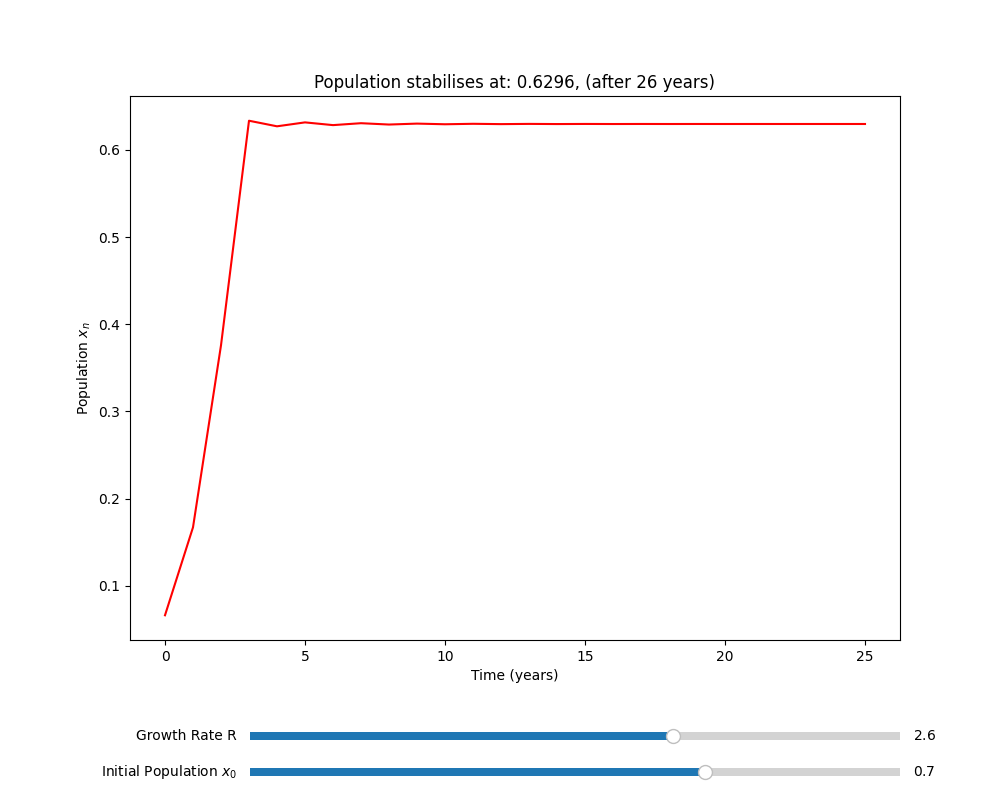

In [19]:
def g(ini_pop, r):                     # Function which generates the data for population against time graphs
    time = np.arange(0,10001,1)
    pop = []
    pop.append(f(ini_pop, r))
    if r >= 3:
        time = np.arange(0,61,1)
    for i in range(len(time)-1):
        pop.append(f(pop[i], r))
        if 0.99999 < pop[i]/pop[i-1] < 1.00001 or pop[-1] == 0:
            break
    return pop


ini_pop = rand.random()                # Initial conditions
r  = 2.7

time = np.arange(0,1001,1)
pop = g(ini_pop, r)                    # Generating first shown plot when graph is made

time = time[:len(pop)]                 # Adjusting size of time data for identical dimensions

fig, ax = plt.subplots(figsize=(10,8)) # Creating the plot using matplotlib, adding settings
plt.subplots_adjust(bottom = 0.2, left = 0.13)
line, = plt.plot(time, pop, color='red')
plt.ylabel('Population $x_n$')
plt.xlabel('Time (years)')
ax.set_title(f"Population stabilises at: {round(pop[-1], 4)}, (after {len(pop)} years)")

ax_r = plt.axes([0.25, 0.07, 0.65, 0.02]) # Creating slider for growth rate
r_factor = Slider(ax_r, 'Growth Rate R', valmin= 0, valmax= 4, valinit= 2.6, valstep= 0.05)

ax_ini_pop = plt.axes([0.25, 0.025, 0.65, 0.02]) # Creating slider for initial population
ini_pop_factor = Slider(ax_ini_pop, 'Initial Population $x_0$', valmin= 0, valmax= 1, valinit= 0.7, valstep= 0.01)

def update(val):                          # Update function for new plot when slider changes value
    data = g(ini_pop_factor.val, r_factor.val)
    line.set_ydata(data)
    line.set_xdata(np.arange(0,len(data),1))
    if r_factor.val < 3:
        ax.set_title(f"Population stabilises at: {round(data[-1], 4)}, (after {len(data)} years)")
    elif r_factor.val < 3.6:
        ax.set_title('The stable value is now bifurcated')
    else:
        ax.set_title('The stable value is now chaotic')

    ax.relim()                            # Updating axes limits for each new plot after slider movement
    ax.autoscale_view()
    
    fig.canvas.draw_idle()                # Redraw current figure

r_factor.on_changed(update)               # Call update() every time slider is moved
ini_pop_factor.on_changed(update)

plt.show()